# 다중공선성과 변수 선택
- `다중공선성 multicollinearity` : 독립변수의 일부가 다른 독립변수의 조합으로 표현될 수 있는 경우
    - 독립변수들이 서로 독립이 아니라 상호상관관계가 강한 경우와 같다.
    - 독립변수의 공분산 행렬이 풀랭크(full-rank)이어야 한다는 조건을 침해한다. 
- 해결 방법
    - 변수 선택법으로 의존적 변수 삭제 : VIF 사용
    - PCA(principle component analysis) 방법으로 의존적인 성분 삭제
    - 정규화(regularized) 방법 사용

## 1. 독립변수의 상관관계 강한 예
- 미국의 거시경제 지표
    - TOTEMP : total employmnet : 총고용지수
    - GNPDEFL : GNP delflator : GNP 디플레이터 : 실질 GNP를 구하기 위한 물가지수
    - GNP : GNP 
    - UNEMP : number of unemployed : 실업자수
    - ARMED : size of armed forces : 군대규모
    - POP : population : 인구수
    - YEAR : year (1947~1962)

### 1-1. 데이터 임포트
- 16년 간의 연도별 데이터

In [2]:
from statsmodels.datasets.longley import load_pandas

In [4]:
dfy = load_pandas().endog
dfX = load_pandas().exog

In [8]:
dfy

0     60323.0
1     61122.0
2     60171.0
3     61187.0
4     63221.0
5     63639.0
6     64989.0
7     63761.0
8     66019.0
9     67857.0
10    68169.0
11    66513.0
12    68655.0
13    69564.0
14    69331.0
15    70551.0
Name: TOTEMP, dtype: float64

In [7]:
dfX

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0


In [9]:
print(len(dfy), len(dfX))

16 16


### 1-2. 독립변수와 종속변수
- 독립변수 : GNPDEFL, GNP, UNEMP, ARMED, POP, YEAR
- 종속변수 : TOTEMP

In [10]:
df = pd.concat([dfX, dfy], axis=1)
df.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0,60323.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0,61122.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0,60171.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0,61187.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0,63221.0


### 1-3. 독립변수들간의 상관관계
- 독립변수들간에 강한 상관관계가 있다.
- sns.pairplot() 사용

<Figure size 576x432 with 0 Axes>

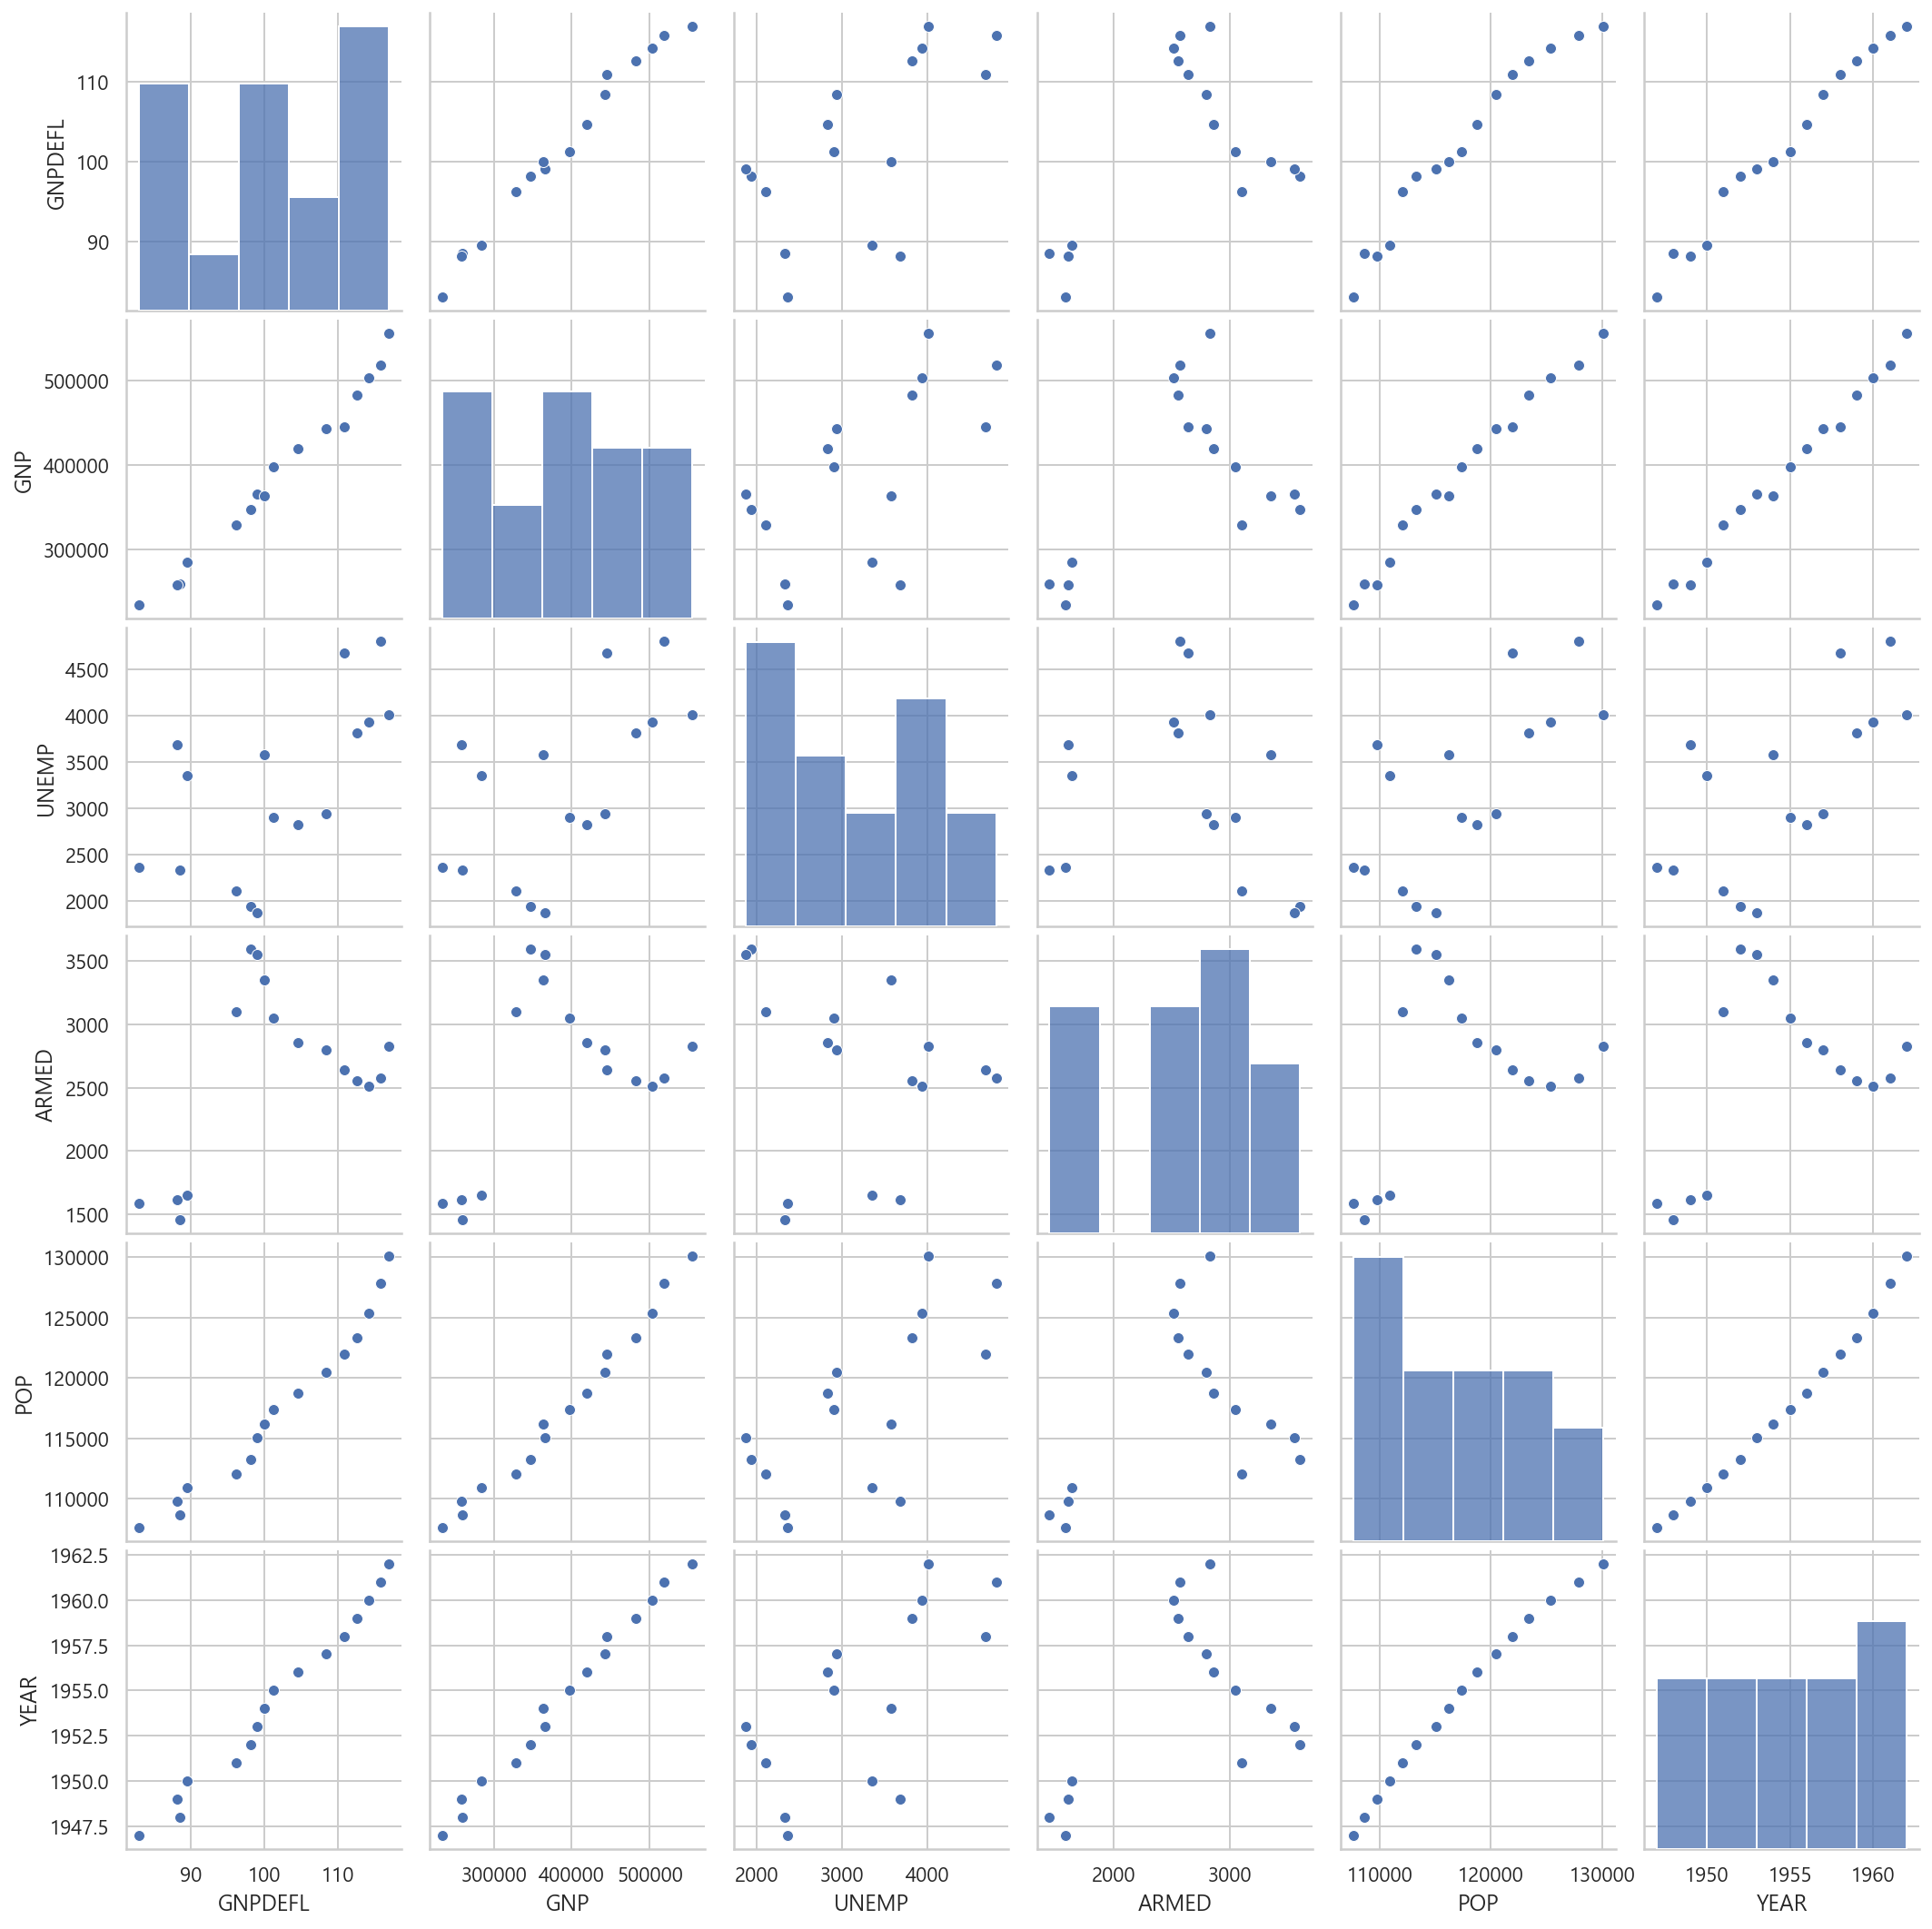

In [11]:
%matplotlib inline

plt.figure(figsize=(8, 6))
sns.pairplot(dfX)
plt.show() ;

### 1-4. 상관계수 행렬 확인

In [12]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


### 1-4. 히트맵으로 상관계수 시각화
- ARMED 독립변수를 제외한 나머지 독립변수들은 서로 상관관계가 강하다.

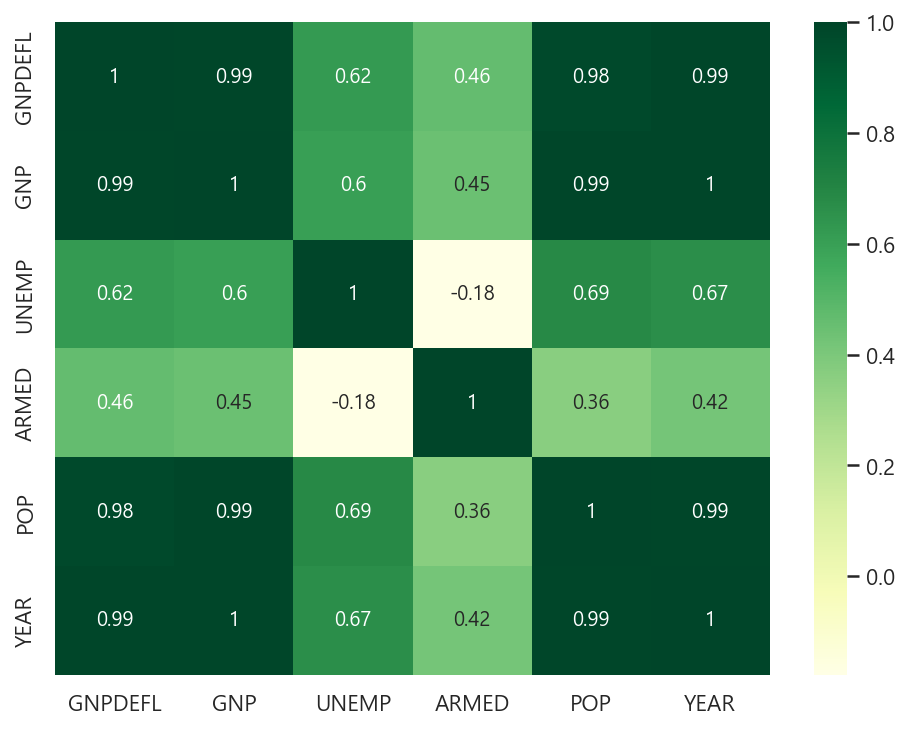

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(dfX.corr(), annot=True, cmap="YlGn")
plt.show() ; 

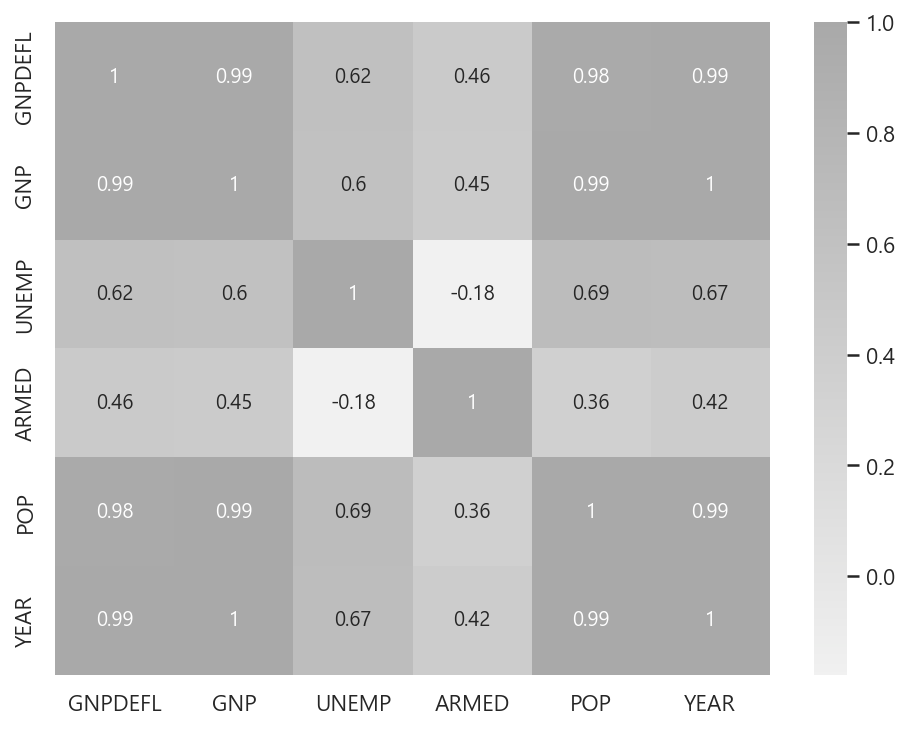

In [16]:
plt.figure(figsize=(8, 6))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
plt.show() ;

### 1-5. OLS 분석
- 공분산 행렬의 조건수(conditional number) 확인
    - **다중 공선성이 있으면 조건수가 증가한다.**
    - 즉 독립변수들간의 강한 상관관계가 있으면 조건수가 증가한다. 
- OLS summary의 Notes 부분에 조건수가 크다는 경고 메시지가 나온다.
- R2 결정계수 값도 1.0으로 과최적화 발생하였다.
    - 과최적화가 발생하면 학습데이터의 성능과 검증데이터의 성능이 차이가 크다.
    - 즉 학습데이터에 모형이 과도하게 최적화 되어 있다는 의미

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df.columns

Index(['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR', 'TOTEMP'], dtype='object')

In [34]:
def get_model1(seed) : 
    
    """
    train, test data split
    OLS model create : used all columns
    return train data, test data, model fit
    """
    
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ " + "+".join(df.columns[:-1]),
                                data=df_train)
    
    return df_train, df_test, model.fit()

In [35]:
"TOTEMP ~ " + "+".join(df.columns[:-1])

'TOTEMP ~ GNPDEFL+GNP+UNEMP+ARMED+POP+YEAR'

In [36]:
df_train, df_test, result1 = get_model1(3)

In [37]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Mon, 08 Aug 2022   Prob (F-statistic):             0.0366
Time:                        15:06:21   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.1

### 1-6. 분석 모형의 성능 비교
- 학습데이터와 검증데이터의 성능의 차이가 크다. 과최적화가 발생함.
    - 학습데이터에 대한 성능 R2 : 1.0
    - 검증데이터에 대한 성능 R2 : 
        - 평균 : 0.9217, 최소 : 0.7589, 최대 : 0.9879

In [51]:
def calc_r2(df_test, result) : 
    
    # 검증데이터의 인덱스에 해당하는 종속변수, 정답
       ## df_test.TOTEMP 로 해도 같은 값이다.
    target = df.loc[df_test.index].TOTEMP
    # 훈련된 모형으로 검증데이터를 예측한 값
    predict_test = result.predict(df_test)
    # RSS : 잔차의 이동범위 : 잔차제곱합 : 예측값 - 정답의 제곱의 합 : 잔차의 크기
    RSS = ((predict_test - target) ** 2).sum()
    # TSS : total sum of square : 종속변수의 이동범위 : 종속변수의 분산
    TSS = ((target - target.mean()) ** 2).sum()
    # 결정계수 : R Squared
    
    return 1 - RSS / TSS

In [52]:
df_train.index

Int64Index([10, 1, 15, 8, 6, 5, 12, 14], dtype='int64')

In [53]:
df_test.index

Int64Index([7, 11, 13, 9, 2, 0, 3, 4], dtype='int64')

In [54]:
df_test.TOTEMP

7     63761.0
11    66513.0
13    69564.0
9     67857.0
2     60171.0
0     60323.0
3     61187.0
4     63221.0
Name: TOTEMP, dtype: float64

In [55]:
df.loc[df_test.index].TOTEMP

7     63761.0
11    66513.0
13    69564.0
9     67857.0
2     60171.0
0     60323.0
3     61187.0
4     63221.0
Name: TOTEMP, dtype: float64

#### 학습데이터에 대한 성능과 검증데이터에 대한 성능에 차이 발생

In [56]:
test1 = []
for i in range(10) : 
    # train_test_split의 seed 값을 0~9까지 바꿔가며 모형 훈련
    df_train, df_test, result = get_model1(i)
    test1.append(calc_r2(df_test, result))

In [57]:
test1

[0.9815050656823511,
 0.9738497543152868,
 0.9879366369958154,
 0.758886196791691,
 0.9807206089302165,
 0.8937889315154686,
 0.8798563810581208,
 0.9314665778970109,
 0.8608525682285371,
 0.9677198735149632]

In [60]:
print("평균 : {:.4f}, 최소 : {:.4f}, 최대 : {:.4f}".format(
    np.array(test1).mean(), np.array(test1).min(), np.array(test1).max()))

평균 : 0.9217, 최소 : 0.7589, 최대 : 0.9879


## 2. 과최적화 방지 방법
- 독립변수가 서로 의존하게 되면 과최적화(overfitting)이 발생한다.
    - 회귀분석 결과의 안전성을 해칠 가능성이 높아지게 된다.
- 과최적화 방지방법
    - **변수선택법으로 의존적인 변수 삭제**
    - **PCA(principle component analysis)방법으로 의존적인 성분 삭제**
    - **정규화(regularized) 방법 사용**

## 3. VIF 방법
- 다중공선성을 없애는 기본방법은 다른 변수에 의존하는 변수를 없애는 방법이다.
- `VIF variance inflation factor` : 어떤 독립변수가 가장 의존적인지 선택하는 방법
    - 독립변수를 다른 독립변수로 선형회귀분석한 성능값
    - $\text{VIF}_i = \dfrac{\sigma^2}{(n-1)\text{Var}[X_i]} \cdot \dfrac{1}{1-R_i^2}$ 
    - R_i^2는 다른 변수로 i번째 변수를 선형회귀한 성능 : 결정계수
- **다른 변수에 의존적일 수록 VIF값이 커진다.**
    - 다른 변수에 의존적이다 -> VIF값이 크다
    - VIF값이 크다 -> R_i^2값이 크다
    - R_i^2 값이 크다 -> 다른 독립변수로 i번째 독립변수를 선형회귀분석 했을 때 성능이 높다. 즉 상관관계가 크다.
- 변수 선택에 있어서 다른 독립변수에 의존도가 높은 독립변수를 삭제하는데, VIF 값을 기준으로 선택할 수 있다. 

## 3-1. VIF 계산

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = pd.DataFrame()
vif

""


In [70]:
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for 
                     i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [71]:
vif.sort_values("VIF Factor")

,VIF Factor,features
3,39.983386,ARMED
2,136.224354,UNEMP
1,10290.435437,GNP
0,12425.514335,GNPDEFL
5,84709.950443,YEAR
4,101193.161993,POP


In [68]:
[variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]

[12425.514335354637,
 10290.435436791722,
 136.2243535629104,
 39.9833855829122,
 101193.16199321792,
 84709.9504430369]

In [64]:
dfX.values

array([[8.30000e+01, 2.34289e+05, 2.35600e+03, 1.59000e+03, 1.07608e+05,
        1.94700e+03],
       [8.85000e+01, 2.59426e+05, 2.32500e+03, 1.45600e+03, 1.08632e+05,
        1.94800e+03],
       [8.82000e+01, 2.58054e+05, 3.68200e+03, 1.61600e+03, 1.09773e+05,
        1.94900e+03],
       [8.95000e+01, 2.84599e+05, 3.35100e+03, 1.65000e+03, 1.10929e+05,
        1.95000e+03],
       [9.62000e+01, 3.28975e+05, 2.09900e+03, 3.09900e+03, 1.12075e+05,
        1.95100e+03],
       [9.81000e+01, 3.46999e+05, 1.93200e+03, 3.59400e+03, 1.13270e+05,
        1.95200e+03],
       [9.90000e+01, 3.65385e+05, 1.87000e+03, 3.54700e+03, 1.15094e+05,
        1.95300e+03],
       [1.00000e+02, 3.63112e+05, 3.57800e+03, 3.35000e+03, 1.16219e+05,
        1.95400e+03],
       [1.01200e+02, 3.97469e+05, 2.90400e+03, 3.04800e+03, 1.17388e+05,
        1.95500e+03],
       [1.04600e+02, 4.19180e+05, 2.82200e+03, 2.85700e+03, 1.18734e+05,
        1.95600e+03],
       [1.08400e+02, 4.42769e+05, 2.93600e+03, 2.7

#### 독립변수의 갯수

In [66]:
dfX.shape[1]

6

### 3-2. 변수 선택
- 상관계수와 VIF를 사용하여 독립변수를 선택
    - 다른 독립변수와 상관관계가 낮은 독립변수 : ARMED, UNEMP, POP, GNP
    - VIF 값이 작은 독립변수 : ARMED, UNEMP, GNP, GNPDFL
    - 따라서 ARMED, UNEMP, GNP 3개의 독립변수가 다른 독립변수에 대한 의존도가 낮다고 볼 수 있다.
- 선택한 변수로 다시 OLS 분석 시행
- 의존성이 높은 변수를 제거하고 일부 독립변수만으로 OLS 분석을 하면 성능이 비슷한 수준이다.

In [72]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


In [77]:
corr_matrix = dfX.corr().copy()
corr_matrix["mean"] = dfX.corr().agg("mean")
corr_matrix[["mean"]].sort_values("mean")

,mean
ARMED,0.419237
UNEMP,0.567047
POP,0.835862
GNP,0.838108
GNPDEFL,0.841213
YEAR,0.844313


In [78]:
vif.sort_values("VIF Factor")

,VIF Factor,features
3,39.983386,ARMED
2,136.224354,UNEMP
1,10290.435437,GNP
0,12425.514335,GNPDEFL
5,84709.950443,YEAR
4,101193.161993,POP


#### 변수선택 한 후 포뮬라 식에서 스케일링 적용
- 독립변수마다 표준편차 std 값이 다르다.

In [90]:
dfX.describe()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,101.681250,387698.437500,3193.312500,2606.687500,117424.000000,1954.500000
std,10.791553,99394.937795,934.464247,695.919604,6956.101561,4.760952
min,83.000000,234289.000000,1870.000000,1456.000000,107608.000000,1947.000000
25%,94.525000,317881.000000,2348.250000,2298.000000,111788.500000,1950.750000
50%,100.600000,381427.000000,3143.500000,2717.500000,116803.500000,1954.500000
75%,111.250000,454085.500000,3842.500000,3060.750000,122304.000000,1958.250000
max,116.900000,554894.000000,4806.000000,3594.000000,130081.000000,1962.000000


In [79]:
def get_model2(seed) : 
    df_train, df_test  = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)",
                               data=df_train)
    return df_train, df_test, model.fit()

In [80]:
df_train, df_test, result2 = get_model2(3)

In [85]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           0.000231
Time:                        16:11:41   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

In [81]:
df_train

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0,63639.0
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0,60323.0
11,110.8,444546.0,4681.0,2637.0,121950.0,1958.0,66513.0
14,115.7,518173.0,4806.0,2572.0,127852.0,1961.0,69331.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0,61187.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0,67857.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0,66019.0
10,108.4,442769.0,2936.0,2798.0,120445.0,1957.0,68169.0


In [82]:
df_test

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0,63761.0
13,114.2,502601.0,3931.0,2514.0,125368.0,1960.0,69564.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0,63221.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0,61122.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0,64989.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0,60171.0
12,112.6,482704.0,3813.0,2552.0,123366.0,1959.0,68655.0
15,116.9,554894.0,4007.0,2827.0,130081.0,1962.0,70551.0


In [89]:
print("모든 독립변수 사용 R2 : {:.5f}".format(result1.rsquared))
print("변수선택 방법 사용 R2 : {:.5f}".format(result2.rsquared))

모든 독립변수 사용 R2 : 0.99962
변수선택 방법 사용 R2 : 0.98888


### 3-3. 학습 성능과 검증 성능 비교
- 다중공선성을 제거 한 후 학습성능과 검증성능을 비교해본다.
- 과최적화가 발생하지 않는다는 것을 알 수 있다.

In [91]:
test2 = []
for i in range(10) : 
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))

In [92]:
test2

[0.9763608388904904,
 0.9841984331185699,
 0.9687069366140135,
 0.9397304053201773,
 0.9773357061188465,
 0.9561262155732322,
 0.980385249669863,
 0.9917361722470804,
 0.9837134067639456,
 0.9789512977093213]

In [94]:
print("학습성능 : {:.4f}".format(result2.rsquared))
print("평균 : {:.4f}, 최소 : {:.4f}, 최대 : {:.4f}".format(
    np.array(test2).mean(), np.array(test2).min(), np.array(test2).max()))

학습성능 : 0.9889
평균 : 0.9737, 최소 : 0.9397, 최대 : 0.9917


### 3-4. 학습성능과 검증성능 비교

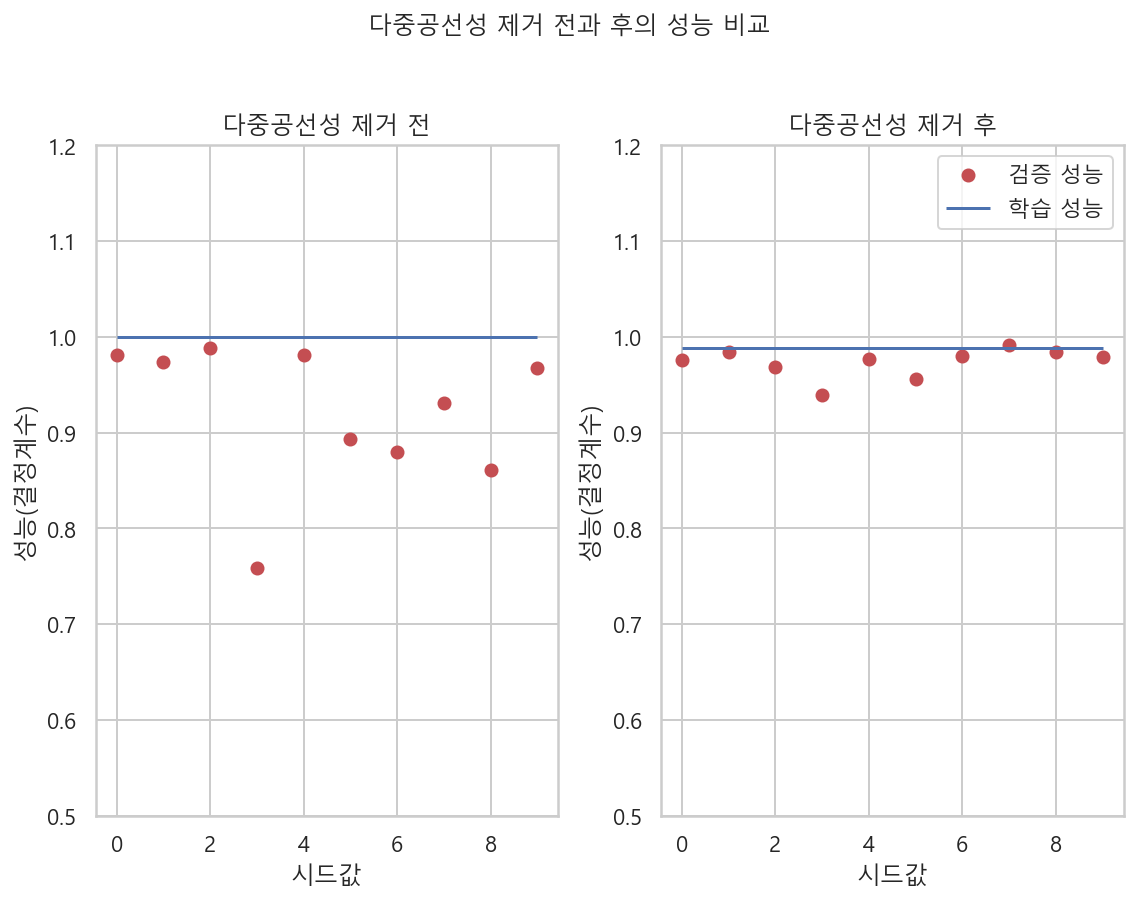

In [96]:
plt.figure(figsize=(8, 6))

plt.subplot(121)
plt.plot(test1, "ro", label="검증 성능")
plt.hlines(result1.rsquared, 0, 9, label="학습 성능")
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 전")
plt.ylim(0.5, 1.2)

plt.subplot(122)
plt.plot(test2, "ro", label="검증 성능")
plt.hlines(result2.rsquared, 0, 9, label="학습 성능")
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 후")
plt.ylim(0.5, 1.2)

plt.suptitle("다중공선성 제거 전과 후의 성능 비교", y=1.04)
plt.legend()
plt.tight_layout()
plt.show() ; 

## 4. 보스턴 집값 예측 문제에 응용

### 4-1. 데이터 임포트

In [39]:
from sklearn.datasets import load_boston

In [40]:
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX0.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 4-2. patsy 패키지의 dmatirx 함수 사용
- 판다스 데이터 프레임의 변형을 자유롭게 할 수 있다.
    - 원하는 데이터만 선택하거나 조합을 할 수 있다.
    - 독립변수를 변형할 수 있다. I(+, -), 상호작용(*), scale(), 로그, 제곱근, 제곱항 등  
- 변수 스케일링 
    - center() : 평균을 0으로 함
    - standardize() : 평균을 0, 표준편차를 1로 함
    - scale() : standardize()와 같음

In [41]:
from patsy import dmatrix

In [42]:
formula = "scale(CRIM) + scale(I(CRIM ** 2)) + " + \
"scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + " + \
"scale(NOX) + scale(RM) + scale(AGE) + " + \
"scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
"scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"

formula

'scale(CRIM) + scale(I(CRIM ** 2)) + scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + scale(NOX) + scale(RM) + scale(AGE) + scale(np.log(DIS)) + scale(RAD) + scale(TAX) + scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS'

In [43]:
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfX

,Intercept,scale(CRIM),scale(I(CRIM ** 2)),scale(ZN),scale(I(ZN ** 2)),scale(INDUS),scale(NOX),scale(RM),scale(AGE),scale(np.log(DIS)),scale(RAD),scale(TAX),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS
0,1.0,-0.419782,-0.169474,0.284830,-0.191030,-1.287909,-0.144217,0.413672,-0.120013,0.409104,-0.982843,-0.666608,-1.443977,0.441052,-1.275260,0.0
1,1.0,-0.417339,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,0.194274,0.367166,0.769562,-0.867883,-0.987329,-0.230278,0.441052,-0.263711,0.0
2,1.0,-0.417342,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,1.282714,-0.265812,0.769562,-0.867883,-0.987329,-0.230278,0.396427,-1.627858,0.0
3,1.0,-0.416750,-0.169472,-0.487722,-0.368889,-1.306878,-0.835284,1.016303,-0.809889,1.139194,-0.752922,-1.106115,0.165279,0.416163,-2.153192,0.0
4,1.0,-0.412482,-0.169465,-0.487722,-0.368889,-1.306878,-0.835284,1.228577,-0.511180,1.139194,-0.752922,-1.106115,0.165279,0.441052,-1.162114,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,-0.413229,-0.169466,-0.487722,-0.368889,0.115738,0.158124,0.439316,0.018673,-0.520096,-0.982843,-0.803212,1.095518,0.387217,-0.169811,0.0
502,1.0,-0.415249,-0.169470,-0.487722,-0.368889,0.115738,0.158124,-0.234548,0.288933,-0.668950,-0.982843,-0.803212,1.095518,0.441052,-0.274682,0.0
503,1.0,-0.413447,-0.169467,-0.487722,-0.368889,0.115738,0.158124,0.984960,0.797449,-0.768920,-0.982843,-0.803212,1.095518,0.441052,-1.067939,0.0
504,1.0,-0.407764,-0.169451,-0.487722,-0.368889,0.115738,0.158124,0.725672,0.736996,-0.588482,-0.982843,-0.803212,1.095518,0.403225,-0.836660,0.0


In [44]:
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfy.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 4-3. 아웃라이어 제거
- `레버리지 leverage` : 종속변수 y가 예측치 hat{y}에 미치는 영향, 영향도 행렬 H의 대각성분, h_ii
    - 실제값 yi가 예측값 hat{yi}를 자신의 위치로 끌어당기는 정도
    - 레버리지가 큰 데이터는 모형에 미치는 영향이 크다.
    - 레버리지가 작은 데이터는 모형에 미치는 영향이 크지 않다.
    - 레버리지가 커도 오차가 작은 데이터는 모형에 미치는 영향이 크지 않다.
- `아웃라이어 outlier` : 잔차가 큰 데이터
    - 잔차의 크기는 독립변수의 영향을 받는다. 따라서 아웃라이어를 찾으려면 이 독립변수의 영향을 제거한 표준화된 잔차를 계산해야한다.
    - 오차의 표준편차는 모든 표본에 대해 같지만, 개별적인 잔차의 표준편차는 레버리지에 따라 달라진다.
    - 오차의 표준편차 추정값 : $s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K}$
- `표준화 잔차 standardized residual, normalized residual, standard residual)`: 잔차를 레버리지와 잔차의 표준 편차로 나누어 동일한 표준 편차를 갖도록 스케일링 한 것
    - $r_i = \dfrac{e_i}{s \sqrt{1-h_{ii}}}$
- `쿡스 디스턴스 Cook's distance` : 잔차와 레버리지를 동시에 보여주는 값
    - 잔차의 크기가 큰 데이터가 아웃라이어인데, 이 중에서도 레버리지와 잔차의 크기가 모두 큰 데이터가 중요하다.
- `폭스 아웃라이어 레커멘데이션 fox' outlier recommendation` : 쿡스 디스턴스 값의 특정한 기준값. 이 기준값 보다 크면 아웃라이어로 판단한다.

#### OLS 모형 만들기

In [47]:
dfXX = sm.add_constant(dfX0)
dfyy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston = sm.OLS(dfyy, dfXX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfXX)

In [48]:
pred

0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64

#### 추정값 객체에서 영향도 행렬을 반환

In [49]:
influence_boston = result_boston.get_influence()
influence_boston

#### 영향도 행렬에서 쿡스 디스턴스 값 계산

In [50]:
cooks_d2, pvals = influence_boston.cooks_distance

In [51]:
cooks_d2

array([2.00241182e-03, 4.22857395e-04, 6.55853503e-04, 1.18058057e-03,
       3.59851425e-03, 5.74194665e-04, 4.72546845e-07, 5.82635409e-03,
       4.62994000e-03, 4.01383186e-08, 1.92640255e-03, 5.67459552e-04,
       3.62408248e-05, 3.22586961e-05, 5.58811130e-05, 1.65626094e-05,
       4.91207261e-04, 1.32490825e-05, 1.27398506e-03, 1.69581259e-06,
       6.97222384e-05, 1.60947828e-04, 2.07796361e-05, 2.90688609e-05,
       3.11014124e-07, 1.38389141e-05, 6.48388494e-05, 4.41362303e-07,
       7.33485688e-05, 7.62795999e-07, 9.89547175e-05, 7.46407072e-04,
       2.28054439e-03, 7.20316848e-05, 3.22115187e-06, 7.68854322e-04,
       1.71832946e-04, 1.67793317e-04, 1.60591201e-04, 3.26965825e-05,
       5.21299660e-05, 1.81626540e-04, 7.02029486e-07, 6.26114010e-07,
       1.07290360e-04, 3.36163087e-04, 8.50425200e-06, 1.50051230e-04,
       4.98762064e-03, 2.55758721e-04, 1.04455561e-04, 6.00527884e-04,
       2.93524386e-04, 1.88430383e-05, 2.23822707e-03, 2.20578470e-03,
      

In [52]:
pvals

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

#### 폭스 아웃라이어 추천값 계산

In [53]:
K = influence_boston.k_vars
K

14

In [55]:
fox_cr = 4 / (len(dfyy) - (K) - 1)
fox_cr

0.008146639511201629

#### 쿡스 디스턴스에서 폭스 추천값보다 큰 것만 반환

In [56]:
idx = np.where(cooks_d2 > fox_cr)[0]
idx

array([ 64, 141, 148, 161, 162, 163, 166, 186, 195, 214, 225, 228, 233,
       253, 262, 267, 364, 365, 367, 368, 369, 370, 371, 372, 374, 375,
       380, 412, 414], dtype=int64)

#### 집값이 50인 데이터의 인덱스 합하기

In [57]:
idx = np.hstack([idx, np.where(boston.target == 50)[0]])
idx

array([ 64, 141, 148, 161, 162, 163, 166, 186, 195, 214, 225, 228, 233,
       253, 262, 267, 364, 365, 367, 368, 369, 370, 371, 372, 374, 375,
       380, 412, 414, 161, 162, 163, 166, 186, 195, 204, 225, 257, 267,
       283, 368, 369, 370, 371, 372], dtype=int64)

#### 본문에서는 다른 아웃라이어 인덱스를 사용함

In [58]:
idx_outlier = \
np.array([7,  54, 148, 152, 160, 214, 253, 267, 364, 365, 367, 368, 369,
              371, 372, 374, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410,
              412, 413, 414, 415, 416, 418, 419, 426, 445, 489, 490, 492, 505,
              161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
              370, 371, 372])
idx_outlier

array([  7,  54, 148, 152, 160, 214, 253, 267, 364, 365, 367, 368, 369,
       371, 372, 374, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410,
       412, 413, 414, 415, 416, 418, 419, 426, 445, 489, 490, 492, 505,
       161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
       370, 371, 372])

In [59]:
len(idx_outlier)

55

In [60]:
final_idx = list(set(range(len(dfX))).difference(idx_outlier))
final_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 19

In [61]:
dfX = dfX.iloc[final_idx, :].reset_index(drop=True)
dfy = dfy.iloc[final_idx, :].reset_index(drop=True)

In [63]:
dfX.head()

,Intercept,scale(CRIM),scale(I(CRIM ** 2)),scale(ZN),scale(I(ZN ** 2)),scale(INDUS),scale(NOX),scale(RM),scale(AGE),scale(np.log(DIS)),scale(RAD),scale(TAX),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS
0,1.0,-0.419782,-0.169474,0.284830,-0.191030,-1.287909,-0.144217,0.413672,-0.120013,0.409104,-0.982843,-0.666608,-1.443977,0.441052,-1.275260,0.0
1,1.0,-0.417339,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,0.194274,0.367166,0.769562,-0.867883,-0.987329,-0.230278,0.441052,-0.263711,0.0
2,1.0,-0.417342,-0.169473,-0.487722,-0.368889,-0.593381,-0.740262,1.282714,-0.265812,0.769562,-0.867883,-0.987329,-0.230278,0.396427,-1.627858,0.0
3,1.0,-0.416750,-0.169472,-0.487722,-0.368889,-1.306878,-0.835284,1.016303,-0.809889,1.139194,-0.752922,-1.106115,0.165279,0.416163,-2.153192,0.0
4,1.0,-0.412482,-0.169465,-0.487722,-0.368889,-1.306878,-0.835284,1.228577,-0.511180,1.139194,-0.752922,-1.106115,0.165279,0.441052,-1.162114,0.0


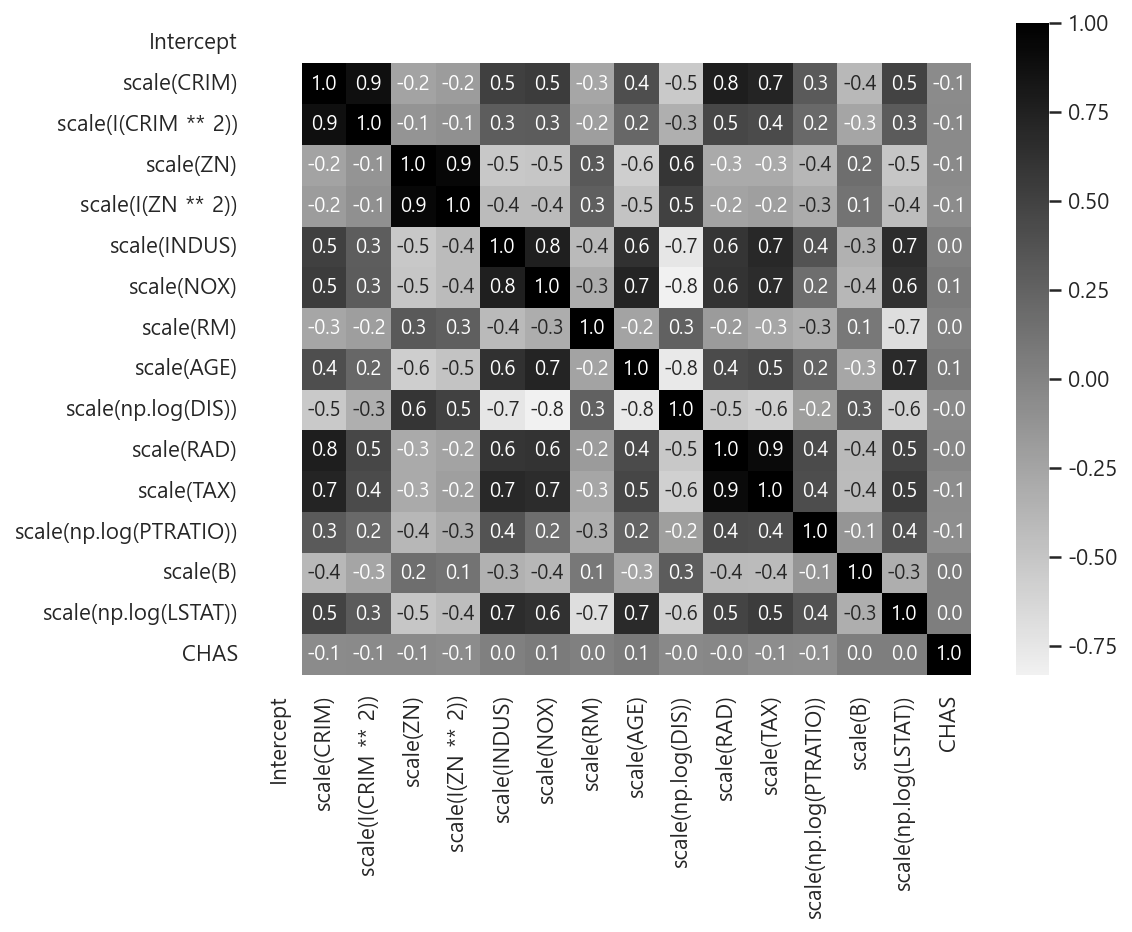

In [64]:
%matplotlib inline

plt.figure(figsize=(8, 6))
cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, fmt="3.1f", cmap=cmap)
plt.show() ;

### 4-4. VIF 계산

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) 
                     for i in range(dfX.shape[1])]
vif["features"] = dfX.columns

vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.061624,CHAS
1,1.338325,scale(B)
2,1.478553,Intercept
3,1.780320,scale(np.log(PTRATIO))
4,2.596496,scale(RM)
5,3.748931,scale(AGE)
6,3.807459,scale(INDUS)
7,4.682812,scale(np.log(LSTAT))
8,5.071802,scale(NOX)
9,5.215025,scale(np.log(DIS))


In [93]:
corr_matrix = dfX.corr().copy()
corr_matrix["mean"] = corr_matrix.agg("mean")

In [94]:
corr_matrix[["mean"]].sort_values("mean")

,mean
scale(np.log(DIS)),-0.165750
scale(B),-0.082051
scale(RM),-0.059779
scale(ZN),-0.030465
scale(I(ZN ** 2)),-0.001190
CHAS,0.054154
scale(np.log(PTRATIO)),0.137200
scale(AGE),0.168852
scale(np.log(LSTAT)),0.175985
scale(NOX),0.198744


### 4-5. 변수 선택
- 상관계수 값이 작은 것
- VIF 값이 작은 것

#### 전체 변수를 사용한 OLS

In [84]:
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.56e-185
Time:                        19:11:58   Log-Likelihood:                 317.45
No. Observations:                 456   AIC:                            -602.9
Df Residuals:                     440   BIC:                            -536.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

#### 변수 선택한 독립변수로 OLS 분석

In [85]:
vif

,VIF Factor,features
0,1.061624,CHAS
1,1.338325,scale(B)
2,1.478553,Intercept
3,1.780320,scale(np.log(PTRATIO))
4,2.596496,scale(RM)
5,3.748931,scale(AGE)
6,3.807459,scale(INDUS)
7,4.682812,scale(np.log(LSTAT))
8,5.071802,scale(NOX)
9,5.215025,scale(np.log(DIS))


In [95]:
corr_mean = corr_matrix[["mean"]]
corr_mean["features"] = corr_mean.index
corr_mean.reset_index(drop=True)

,mean,features
0,NaN,Intercept
1,0.264207,scale(CRIM)
2,0.200977,scale(I(CRIM ** 2))
3,-0.030465,scale(ZN)
4,-0.001190,scale(I(ZN ** 2))
5,0.204964,scale(INDUS)
6,0.198744,scale(NOX)
7,-0.059779,scale(RM)
8,0.168852,scale(AGE)
9,-0.165750,scale(np.log(DIS))


In [96]:
corr_vif_df = pd.merge(vif, corr_mean)
corr_vif_df

,VIF Factor,features,mean
0,1.061624,CHAS,0.054154
1,1.338325,scale(B),-0.082051
2,1.478553,Intercept,NaN
3,1.780320,scale(np.log(PTRATIO)),0.137200
4,2.596496,scale(RM),-0.059779
5,3.748931,scale(AGE),0.168852
6,3.807459,scale(INDUS),0.204964
7,4.682812,scale(np.log(LSTAT)),0.175985
8,5.071802,scale(NOX),0.198744
9,5.215025,scale(np.log(DIS)),-0.165750


In [97]:
cols = ["Intercept", "CHAS", "scale(B)", "scale(CRIM)", "scale(np.log(PTRATIO))",
       "scale(RM)", "scale(np.log(LSTAT))"]
cols

['Intercept',
 'CHAS',
 'scale(B)',
 'scale(CRIM)',
 'scale(np.log(PTRATIO))',
 'scale(RM)',
 'scale(np.log(LSTAT))']

In [98]:
len(cols)

7

In [99]:
model_boston2 = sm.OLS(np.log(dfy), dfX[cols])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     380.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.42e-172
Time:                        19:20:33   Log-Likelihood:                 260.52
No. Observations:                 456   AIC:                            -507.0
Df Residuals:                     449   BIC:                            -478.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [108]:
print("변수의 갯수 : {}, 결정계수 : {}".format(len(result_boston1.params),
                                          result_boston1.rsquared))
print("변수의 갯수 : {}, 결정계수 : {}".format(len(result_boston2.params),
                                          result_boston2.rsquared))

변수의 갯수 : 16, 결정계수 : 0.8720144848322324
변수의 갯수 : 7, 결정계수 : 0.8357182842018982


#### 변수 선택 전후 결정계수가 비슷한데 변수 선택을 하는 이유?
- 과최적화를 방지하기 위해서

### 분산분석으로 변수의 중요도 확인
- 독립변수의 상관계수 값, VIF, 분산분석으로 변수 선택

In [129]:
formula = """MEDV ~ scale(CRIM) + scale(I(CRIM ** 2)) + scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + scale(RM) + scale(AGE) + scale(np.log(DIS)) + scale(RAD) + scale(TAX) + scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"""

formula

'MEDV ~ scale(CRIM) + scale(I(CRIM ** 2)) + scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + scale(RM) + scale(AGE) + scale(np.log(DIS)) + scale(RAD) + scale(TAX) + scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS'

In [123]:
dff = pd.concat([dfXX, dfyy], axis=1)
dff

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [130]:
model_boston3 = sm.OLS.from_formula(formula, data=dff)
model_boston3

In [131]:
result_boston3 = model_boston3.fit()
print(result_boston3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     132.8
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          9.72e-157
Time:                        19:53:28   Log-Likelihood:                -1444.1
No. Observations:                 506   AIC:                             2918.
Df Residuals:                     491   BIC:                             2982.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 22

In [136]:
anova_df = sm.stats.anova_lm(result_boston3, typ=2)
anova_df = anova_df[["F"]]
anova_df["features"] = anova_df.index
anova_df = anova_df.reset_index(drop=True)
anova_df

,F,features
0,8.749567,scale(CRIM)
1,1.867071,scale(I(CRIM ** 2))
2,0.656410,scale(ZN)
3,2.189669,scale(I(ZN ** 2))
4,3.687118,scale(INDUS)
5,45.235133,scale(RM)
6,0.040254,scale(AGE)
7,43.791263,scale(np.log(DIS))
8,23.429116,scale(RAD)
9,18.222273,scale(TAX)


In [137]:
pd.merge(corr_vif_df, anova_df)

,VIF Factor,features,mean,F
0,1.061624,CHAS,0.054154,6.556822
1,1.338325,scale(B),-0.082051,10.644547
2,1.780320,scale(np.log(PTRATIO)),0.137200,34.395662
3,2.596496,scale(RM),-0.059779,45.235133
4,3.748931,scale(AGE),0.168852,0.040254
5,3.807459,scale(INDUS),0.204964,3.687118
6,4.682812,scale(np.log(LSTAT)),0.175985,251.319238
7,5.215025,scale(np.log(DIS)),-0.165750,43.791263
8,9.107858,scale(TAX),0.268365,18.222273
9,10.218588,scale(I(CRIM ** 2)),0.200977,1.867071
